<a href="https://colab.research.google.com/github/Victoriarms/Victoriarms/blob/main/HW3_Romenskaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1

Вы хотите узнать, как много значит ранг игрока в теннисе. Проверьте следующие утверждения:

а) Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);

б) Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

**Решение подзадачи а)**:

In [ ]:
import pandas as pd
import glob
from statsmodels.stats import weightstats

glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')
matches_1968_2022 = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')], axis=0)
display(matches_1968_2022)

# найдём и удалим дубликаты
mchs_1968_2022 = matches_1968_2022.copy()
mask1 = mchs_1968_2022.duplicated()
mchs_duplicates = mchs_1968_2022[mask1]
print(f'Число найденных дубликатов: {mchs_duplicates.shape[0]}')
mchs_dedupped = mchs_1968_2022.drop_duplicates()
print(f'Число записей без дубликатов: {mchs_dedupped.shape[0]}')

# сформируем признак разницы рангов
mchs_dedupped['rank_difference'] = mchs_dedupped['winner_rank'] - mchs_dedupped['loser_rank']

# удалим столбцы, в которых более 40% пропусков
drop_mchs = mchs_dedupped.copy()
thresh = drop_mchs.shape[0] * 0.6
drop_mchs = drop_mchs.dropna(thresh=thresh, axis=1)

# создадим датафрейм, где ранг победителей выше более чем на 20 позиций
mask2 = drop_mchs['rank_difference'] > 20
higher_rank_winners = drop_mchs[mask2]
higher_rank_winners.sort_values(by='rank_difference', ascending=False)
print(higher_rank_winners.shape)
display(higher_rank_winners)

# создадим датафрейм, где ранг победителей выше менее чем на 20 позиций или ниже, чем у проигравших
mask3 = drop_mchs['rank_difference'] <= 20
lower_rank_winners = drop_mchs[mask3]
lower_rank_winners.sort_values(by='rank_difference', ascending=False)
print(lower_rank_winners.shape)
display(lower_rank_winners)

# произведём математическую проверку гипотезы
number_of_records = len(higher_rank_winners) + len(lower_rank_winners)
print('Количество матчей: ', number_of_records)
victory_frequency = len(higher_rank_winners) / len(lower_rank_winners)

if victory_frequency > 1:
    print('Игроки с рангом более чем на 20 выше, чем у соперника, побеждают чаще в ', victory_frequency,
          'раз(-a). ГИПОТЕЗА ПРИНЯТА')
elif victory_frequency < 1:
    print('Игроки с рангом более чем на 20 выше, чем у соперника, проигрывают чаще в ',
          len(lower_rank_winners) / len(higher_rank_winners), 'раз(-a).\nГИПОТЕЗА ОТКЛОНЕНА')
else:
    print('Игроки с рангом более чем на 20 выше, чем у соперника, выигрывают с той же частотой, что и игроки с рангом '
          'ниже.\nГИПОТЕЗА ОТКЛОНЕНА')


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,1,100437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,6.0,NaN
1,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,2,100342,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,NaN
2,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,3,100437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN
3,1980-205,Lagos,Clay,32,A,19800225,1,100259,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN
4,1980-205,Lagos,Clay,32,A,19800225,2,100135,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,1991-604,Grand Slam Cup,Carpet,16,A,19911210,11,100656,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,20.0,NaN
3723,1991-604,Grand Slam Cup,Carpet,16,A,19911210,12,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,36.0,NaN
3724,1991-604,Grand Slam Cup,Carpet,16,A,19911210,13,101609,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,4.0,NaN
3725,1991-604,Grand Slam Cup,Carpet,16,A,19911210,14,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,5.0,NaN


Число найденных дубликатов: 44
Число записей без дубликатов: 188123


<ipython-input-31-d439034a5a70>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mchs_dedupped['rank_difference'] = mchs_dedupped['winner_rank'] - mchs_dedupped['loser_rank']


(32271, 25)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,rank_difference
154,1980-243,Perth,Grass,64,A,19800107,296,100488,Chris Delaney,R,...,R,185.0,AUS,27.3,6-1 4-6 6-3,3,QF,90.0,61.0,29.0
208,1980-275,Sao Paulo,Carpet,32,A,19800428,19,100099,Thomaz Koch,L,...,R,183.0,ITA,23.0,6-2 6-4,3,R16,78.0,35.0,43.0
214,1980-275,Sao Paulo,Carpet,32,A,19800428,25,100502,Vincent Van Patten,R,...,R,193.0,PAR,24.5,7-6 7-5,3,QF,45.0,10.0,35.0
224,1980-301,Auckland,Hard,32,A,19800101,4,100328,Rand Evett,R,...,R,180.0,USA,22.7,6-3 3-6 6-0,3,R32,356.0,106.0,250.0
226,1980-301,Auckland,Hard,32,A,19800101,6,100492,John Austin,R,...,R,180.0,NZL,22.8,6-3 6-1,3,R32,156.0,65.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,1991-240,Sao Paulo,Hard,32,A,19911104,29,101761,Jaime Oncins,R,...,L,183.0,ESP,23.0,6-4 6-3,3,SF,74.0,37.0,37.0
3692,1991-240,Sao Paulo,Hard,32,A,19911104,30,101368,Christian Miniussi,R,...,L,193.0,ECU,31.6,6-4 6-4,3,SF,116.0,86.0,30.0
3693,1991-240,Sao Paulo,Hard,32,A,19911104,31,101368,Christian Miniussi,R,...,R,196.0,BRA,21.3,2-6 6-3 6-4,3,F,116.0,74.0,42.0
3710,1991-D045,Davis Cup WG F: FRA vs USA,Carpet,4,D,19911129,2,100936,Henri Leconte,L,...,R,185.0,USA,20.2,6-4 7-5 6-4,5,RR,159.0,6.0,153.0


(108812, 25)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,rank_difference
0,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,1,100437,Bjorn Borg,R,...,L,180.0,ARG,27.4,6-2 6-3,3,SF,1.0,6.0,-5.0
1,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,2,100342,Vitas Gerulaitis,R,...,L,180.0,USA,20.9,7-6 6-3,3,SF,5.0,2.0,3.0
2,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,3,100437,Bjorn Borg,R,...,R,183.0,USA,25.5,6-1 5-7 6-1,3,F,1.0,5.0,-4.0
62,1980-206,Cairo,Clay,32,A,19800303,29,100297,Corrado Barazzutti,R,...,L,173.0,FRA,30.1,6-4 6-1,3,SF,32.0,64.0,-32.0
65,1980-208,Vienna,Clay,32,A,19800618,1,100434,Tomas Smid,R,...,R,170.0,CHI,25.3,7-5 6-1,3,R32,29.0,93.0,-64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,1991-604,Grand Slam Cup,Carpet,16,A,19911210,11,100656,Ivan Lendl,R,...,R,188.0,SUI,27.0,7-6 6-3,3,QF,5.0,20.0,-15.0
3723,1991-604,Grand Slam Cup,Carpet,16,A,19911210,12,102021,Michael Chang,R,...,R,183.0,USA,25.4,6-2 6-4,3,QF,15.0,36.0,-21.0
3724,1991-604,Grand Slam Cup,Carpet,16,A,19911210,13,101609,David Wheaton,R,...,R,193.0,GER,23.1,7-6 7-6 7-6,5,SF,17.0,4.0,13.0
3725,1991-604,Grand Slam Cup,Carpet,16,A,19911210,14,102021,Michael Chang,R,...,R,188.0,USA,31.7,2-6 4-6 6-4 7-6 9-7,5,SF,15.0,5.0,10.0


Количество матчей:  141083
Игроки с рангом более чем на 20 выше, чем у соперника, проигрывают чаще в  3.3718199002200118 раз(-a).
ГИПОТЕЗА ОТКЛОНЕНА


**Решение подзадачи б):**

In [ ]:
# создадим датафрейм, где ранг победителей находится в окне +-5 позиций
mask4 = abs(drop_mchs['rank_difference']) <= 5
hgr_rank_winners = drop_mchs[mask4]
hgr_rank_winners.sort_values(by='rank_difference', ascending=False)
print(hgr_rank_winners.shape)
display(hgr_rank_winners)

# создадим датафрейм, где ранг победителей находится в окне +-5 позиций
mask5 = abs(drop_mchs['rank_difference']) > 5
lwr_rank_winners = drop_mchs[mask5]
lwr_rank_winners.sort_values(by='rank_difference', ascending=False)
print(lwr_rank_winners.shape)
display(lwr_rank_winners)

# произведём математическую проверку гипотезы
number_of_rec = len(hgr_rank_winners) + len(lwr_rank_winners)
print('Количество матчей: ', number_of_rec)
vtry_frequency = len(hgr_rank_winners) / len(lwr_rank_winners)

if victory_frequency > 1:
    print('Игроки с рангом +-5 позиций относительно ранга соперника побеждают чаще в ', victory_frequency,
          'раз(-a). ГИПОТЕЗА ПРИНЯТА')
elif victory_frequency < 1:
    print('Игроки с рангом +-5 позиций относительно ранга соперника проигрывают чаще в ',
          len(lwr_rank_winners) / len(hgr_rank_winners), 'раз(-a).\nГИПОТЕЗА ОТКЛОНЕНА')
else:
    print('Игроки с рангом +-5 позиций относительно ранга соперника выигрывают с той же частотой, что и игроки с '
          'большей разницей ранга.\nГИПОТЕЗА ОТКЛОНЕНА')


(9838, 25)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,rank_difference
0,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,1,100437,Bjorn Borg,R,...,L,180.0,ARG,27.4,6-2 6-3,3,SF,1.0,6.0,-5.0
1,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,2,100342,Vitas Gerulaitis,R,...,L,180.0,USA,20.9,7-6 6-3,3,SF,5.0,2.0,3.0
2,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,3,100437,Bjorn Borg,R,...,R,183.0,USA,25.5,6-1 5-7 6-1,3,F,1.0,5.0,-4.0
157,1980-243,Perth,Grass,64,A,19800107,299,100091,Colin Dibley,R,...,R,183.0,AUT,28.1,6-3 6-1,3,SF,57.0,62.0,-5.0
265,1980-303,Buenos Aires,Clay,32,A,19801117,14,100526,Ricardo Ycaza,R,...,R,185.0,FRA,23.7,3-6 6-0 6-1,3,R32,82.0,87.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,1991-605,Tour Finals,Carpet,8,F,19911112,15,101948,Pete Sampras,R,...,R,193.0,GER,23.0,6-2 7-6(3),3,RR,7.0,4.0,3.0
3709,1991-D045,Davis Cup WG F: FRA vs USA,Carpet,4,D,19911129,1,101736,Andre Agassi,R,...,L,190.0,FRA,26.8,6-7(7) 6-2 6-1 6-2,5,RR,10.0,7.0,3.0
3711,1991-D045,Davis Cup WG F: FRA vs USA,Carpet,4,D,19911129,4,101098,Guy Forget,L,...,R,185.0,USA,20.2,7-6(6) 3-6 6-3 6-4,5,RR,7.0,6.0,1.0
3721,1991-604,Grand Slam Cup,Carpet,16,A,19911210,10,101529,Michael Stich,R,...,L,190.0,FRA,26.9,7-6 6-4,3,QF,4.0,7.0,-3.0


(131245, 25)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,rank_difference
62,1980-206,Cairo,Clay,32,A,19800303,29,100297,Corrado Barazzutti,R,...,L,173.0,FRA,30.1,6-4 6-1,3,SF,32.0,64.0,-32.0
65,1980-208,Vienna,Clay,32,A,19800618,1,100434,Tomas Smid,R,...,R,170.0,CHI,25.3,7-5 6-1,3,R32,29.0,93.0,-64.0
89,1980-208,Vienna,Clay,32,A,19800618,25,100434,Tomas Smid,R,...,R,175.0,ESP,22.1,6-3 7-5,3,QF,29.0,67.0,-38.0
90,1980-208,Vienna,Clay,32,A,19800618,26,100383,Peter Mcnamara,R,...,R,180.0,FRA,30.7,6-1 7-5,3,QF,45.0,78.0,-33.0
93,1980-208,Vienna,Clay,32,A,19800618,29,100434,Tomas Smid,R,...,R,185.0,AUS,24.9,6-4 RET,3,SF,29.0,45.0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,1991-604,Grand Slam Cup,Carpet,16,A,19911210,9,101609,David Wheaton,R,...,R,178.0,AUS,20.6,6-4 7-6,3,QF,17.0,78.0,-61.0
3722,1991-604,Grand Slam Cup,Carpet,16,A,19911210,11,100656,Ivan Lendl,R,...,R,188.0,SUI,27.0,7-6 6-3,3,QF,5.0,20.0,-15.0
3723,1991-604,Grand Slam Cup,Carpet,16,A,19911210,12,102021,Michael Chang,R,...,R,183.0,USA,25.4,6-2 6-4,3,QF,15.0,36.0,-21.0
3724,1991-604,Grand Slam Cup,Carpet,16,A,19911210,13,101609,David Wheaton,R,...,R,193.0,GER,23.1,7-6 7-6 7-6,5,SF,17.0,4.0,13.0


Количество матчей:  141083
Игроки с рангом +-5 позиций относительно ранга соперника проигрывают чаще в  13.340618011791014 раз(-a).
ГИПОТЕЗА ОТКЛОНЕНА


# Задача 2
Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой? Выбор статистического теста обоснуйте.


In [ ]:
import glob
import pandas as pd
from statsmodels.stats import weightstats

glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')
matches_1968_2022 = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')], axis=0)

# найдём и удалим дубликаты
mchs_1968_2022 = matches_1968_2022.copy()
mask1 = mchs_1968_2022.duplicated()
mchs_duplicates = mchs_1968_2022[mask1]
print(f'Число найденных дубликатов: {mchs_duplicates.shape[0]}')
mchs_dedupped = mchs_1968_2022.drop_duplicates()
print(f'Число записей без дубликатов: {mchs_dedupped.shape[0]}')

# удалим строки, в которых отсутствуют значимые данные
matches_clean = mchs_dedupped.dropna(how='any', axis=0)
display(matches_clean)

# создадим 2 нужные нам выборки
matches_grouped = matches_1968_2022.groupby(by='tourney_date', as_index=False).mean()
sets_per_game = matches_grouped.loc[:, ['tourney_date', 'best_of']]
sets_per_game['tourney_year'] = sets_per_game['tourney_date'].astype(str).str[:4]

sets_per_game2001 = sets_per_game.loc[
    (sets_per_game['tourney_year'].astype(int) < 2001) & (sets_per_game['tourney_year'].astype(int) > 1979)]
display(sets_per_game2001)
sets_per_game2022 = sets_per_game.loc[(sets_per_game['tourney_year'].astype(int) > 2001)]
display(sets_per_game2022)

# получим информацию о среднем количестве затраченных сетах в обоих периодах
mean_winsets_2001 = sets_per_game2001['best_of'].mean()
print('Среднее количество сетов, которое победитель затратил на игру в 1980-2001: ', mean_winsets_2001)
mean_winsets_2022 = sets_per_game2022['best_of'].mean()
print('Среднее количество сетов, которое победитель затратил на игру в 2002-2022: ', mean_winsets_2022)

# выполним статистический тест - Z-test https://www.rdocumentation.org/packages/BSDA/versions/1.2.1/topics/z.test

_, p = weightstats.ztest(sets_per_game2001['best_of'], x2=sets_per_game2022['best_of'], value=0,
                         alternative='two-sided')
print(float(p))

if p >= 0.05:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")


Число найденных дубликатов: 44
Число записей без дубликатов: 188123


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points


,tourney_date,best_of,tourney_year
1139,19800101,3.064516,1980
1140,19800107,3.000000,1980
1141,19800109,3.000000,1980
1142,19800114,3.000000,1980
1143,19800121,3.127660,1980
...,...,...,...
2249,20001106,3.000000,2000
2250,20001113,3.042553,2000
2251,20001120,3.032258,2000
2252,20001127,3.133333,2000


,tourney_date,best_of,tourney_year
2300,20020107,3.000000,2002
2301,20020114,5.000000,2002
2302,20020128,3.000000,2002
2303,20020208,4.395833,2002
2304,20020211,3.000000,2002
...,...,...,...
3227,20221123,3.000000,2022
3228,20221124,3.000000,2022
3229,20221125,3.000000,2022
3230,20221126,3.000000,2022


Среднее количество сетов, которое победитель затратил на игру в 1980-2001:  3.4497052024258963
Среднее количество сетов, которое победитель затратил на игру в 2002-2022:  3.336528195685787
0.00038281155508487844
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


# Задача 3
У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

In [ ]:
import glob
import pandas as pd
from statsmodels.stats import weightstats

glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')
matches_1968_2022 = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')], axis=0)

# найдём и удалим дубликаты
mchs_1968_2022 = matches_1968_2022.copy()
mask1 = mchs_1968_2022.duplicated()
mchs_duplicates = mchs_1968_2022[mask1]
print(f'Число найденных дубликатов: {mchs_duplicates.shape[0]}')
mchs_dedupped = mchs_1968_2022.drop_duplicates()
print(f'Число записей без дубликатов: {mchs_dedupped.shape[0]}')

# удалим строки, в которых отсутствуют значимые данные
matches_clean = mchs_dedupped.dropna(how='any', axis=0)
display(matches_clean)

# создадим 2 нужные нам выборки
matches_grouped = matches_1968_2022.groupby(by='tourney_date', as_index=False).mean()
sets_per_game = matches_grouped.loc[:, ['tourney_date', 'best_of']]
sets_per_game['tourney_year'] = sets_per_game['tourney_date'].astype(str).str[:4]
sets_best_of = sets_per_game.loc[sets_per_game['best_of'].astype(int) > 3]
display(sets_best_of)

sets_per_game2001 = sets_best_of.loc[
    (sets_best_of['tourney_year'].astype(int) < 2001) & (sets_best_of['tourney_year'].astype(int) > 1979)]
display(sets_per_game2001)
sets_per_game2022 = sets_best_of.loc[(sets_best_of['tourney_year'].astype(int) > 2001)]
display(sets_per_game2022)

# получим информацию о среднем количестве затраченных сетах в обоих периодах
mean_winsets_2001 = sets_per_game2001['best_of'].mean()
print('Среднее количество сетов, которое победитель затратил на игру в 1980-2001: ', mean_winsets_2001)
mean_winsets_2022 = sets_per_game2022['best_of'].mean()
print('Среднее количество сетов, которое победитель затратил на игру в 2002-2022: ', mean_winsets_2022)

# выполним статистический тест - Z-test https://www.rdocumentation.org/packages/BSDA/versions/1.2.1/topics/z.test

_, p = weightstats.ztest(sets_per_game2001['best_of'], x2=sets_per_game2022['best_of'], value=0,
                         alternative='two-sided')
print(float(p))

if p >= 0.05:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")


Число найденных дубликатов: 44
Число записей без дубликатов: 188123


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points


,tourney_date,best_of,tourney_year
1,19680114,4.935484,1968
2,19680119,5.000000,1968
4,19680131,5.000000,1968
18,19680320,5.000000,1968
20,19680323,4.000000,1968
...,...,...,...
3182,20220117,5.000000,2022
3197,20220523,5.000000,2022
3201,20220627,5.000000,2022
3209,20220829,5.000000,2022


,tourney_date,best_of,tourney_year
1145,19800201,4.500000,1980
1146,19800204,5.000000,1980
1147,19800208,4.828571,1980
1151,19800222,4.000000,1980
1154,19800307,4.809524,1980
...,...,...,...
2231,20000714,4.300000,2000
2233,20000721,4.333333,2000
2239,20000828,5.000000,2000
2244,20001006,4.357143,2000


,tourney_date,best_of,tourney_year
2301,20020114,5.000000,2002
2303,20020208,4.395833,2002
2310,20020405,4.500000,2002
2315,20020503,4.333333,2002
2319,20020527,5.000000,2002
...,...,...,...
3182,20220117,5.000000,2022
3197,20220523,5.000000,2022
3201,20220627,5.000000,2022
3209,20220829,5.000000,2022


Среднее количество сетов, которое победитель затратил на игру в 1980-2001:  4.632813833980097
Среднее количество сетов, которое победитель затратил на игру в 2002-2022:  4.748340891864139
0.0003186712736584463
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


# Задача 4
Вы хотите изучить психологическую устойчивость профессиональных игроков в теннис. Одним из важных показателей такой устойчивости будет доля выигранных брейк-поинтов. Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков), для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд). Постройте box-plot’ы для этих статистик для каждого из игроков. Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков? Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Выбор статистического теста обоснуйте.

fatal: destination path 'tennis_atp' already exists and is not an empty directory.


<ipython-input-17-acf57a23e8a3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  munar_clean['breakpoints_won_perc'] = munar_clean['w_bpSaved'] / munar_clean['w_bpFaced'].where(
<ipython-input-17-acf57a23e8a3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  munar_clean['breakpoints_los_perc'] = munar_clean['w_bpSaved'] / munar_clean['w_bpFaced'].where(


,tourney_date,winner_name,w_bpFaced,l_bpFaced,w_bpSaved,l_bpSaved,tourney_year,breakpoints_won_perc,breakpoints_los_perc
1038,2016-04-18,Albert Ramos,1.0,7.0,0.0,3.0,2016,NaN,0.000000
120,2020-01-13,Albert Ramos,11.0,9.0,8.0,5.0,2020,NaN,0.727273
185,2020-01-20,Jaume Munar,17.0,28.0,12.0,19.0,2020,0.705882,NaN
240,2020-01-20,Alexei Popyrin,4.0,9.0,4.0,5.0,2020,NaN,1.000000
301,2020-02-03,Diego Schwartzman,7.0,8.0,5.0,3.0,2020,NaN,0.714286
...,...,...,...,...,...,...,...,...,...
2403,2022-10-03,Pedro Martinez,8.0,17.0,4.0,10.0,2022,NaN,0.500000
2411,2022-10-03,Jaume Munar,5.0,8.0,4.0,4.0,2022,0.800000,NaN
2476,2022-10-10,Sebastian Korda,0.0,9.0,0.0,5.0,2022,NaN,NaN
2544,2022-10-17,Yoshihito Nishioka,1.0,7.0,0.0,3.0,2022,NaN,0.000000


<ipython-input-17-acf57a23e8a3>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fritz_clean['breakpoints_won_perc'] = fritz_clean['w_bpSaved'] / fritz_clean['w_bpFaced'].where(
<ipython-input-17-acf57a23e8a3>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fritz_clean['breakpoints_los_perc'] = fritz_clean['w_bpSaved'] / fritz_clean['w_bpFaced'].where(


,tourney_date,winner_name,w_bpFaced,l_bpFaced,w_bpSaved,l_bpSaved,breakpoints_won_perc,breakpoints_los_perc,tourney_year
183,2016-01-18,Jack Sock,9.0,9.0,5.0,6.0,NaN,0.555556,2016
374,2016-02-08,Taylor Fritz,3.0,6.0,3.0,4.0,1.000000,NaN,2016
386,2016-02-08,Taylor Fritz,11.0,4.0,9.0,2.0,0.818182,NaN,2016
394,2016-02-08,Taylor Fritz,11.0,7.0,6.0,2.0,0.545455,NaN,2016
398,2016-02-08,Taylor Fritz,9.0,8.0,4.0,3.0,0.444444,NaN,2016
...,...,...,...,...,...,...,...,...,...
2644,2022-10-31,Gilles Simon,9.0,11.0,6.0,7.0,NaN,0.666667,2022
2663,2022-10-31,Taylor Fritz,3.0,10.0,1.0,5.0,0.333333,NaN,2022
2695,2022-11-14,Novak Djokovic,2.0,2.0,0.0,0.0,NaN,0.000000,2022
2700,2022-11-14,Casper Ruud,4.0,5.0,3.0,4.0,NaN,0.750000,2022


<ipython-input-17-acf57a23e8a3>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schwartzman_clean['breakpoints_won_perc'] = schwartzman_clean['w_bpSaved'] / schwartzman_clean['w_bpFaced'].where(
<ipython-input-17-acf57a23e8a3>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schwartzman_clean['breakpoints_los_perc'] = schwartzman_clean['w_bpSaved'] / schwartzman_clean['w_bpFaced'].where(


,tourney_date,winner_name,w_bpFaced,l_bpFaced,w_bpSaved,l_bpSaved,breakpoints_won_perc,breakpoints_los_perc,tourney_year
197,2016-01-18,John Millman,11.0,9.0,6.0,5.0,NaN,0.545455,2016
356,2016-02-08,Diego Schwartzman,12.0,9.0,10.0,5.0,0.833333,NaN,2016
365,2016-02-08,Paolo Lorenzi,9.0,17.0,5.0,10.0,NaN,0.555556,2016
492,2016-02-15,Diego Schwartzman,1.0,8.0,0.0,4.0,0.000000,NaN,2016
507,2016-02-15,Dominic Thiem,6.0,9.0,2.0,3.0,NaN,0.333333,2016
...,...,...,...,...,...,...,...,...,...
2347,2022-09-26,Arthur Rinderknech,8.0,7.0,5.0,5.0,NaN,0.625000,2022
2546,2022-10-17,David Goffin,4.0,12.0,3.0,9.0,NaN,0.750000,2022
2611,2022-10-24,Andrey Rublev,3.0,9.0,3.0,5.0,NaN,1.000000,2022
2666,2022-10-31,Maxime Cressy,1.0,7.0,0.0,3.0,NaN,0.000000,2022


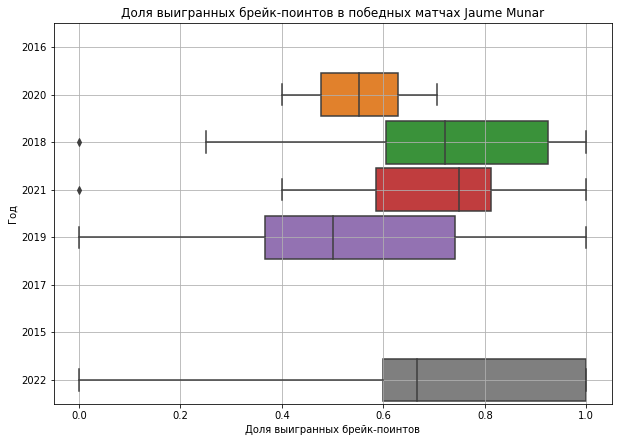

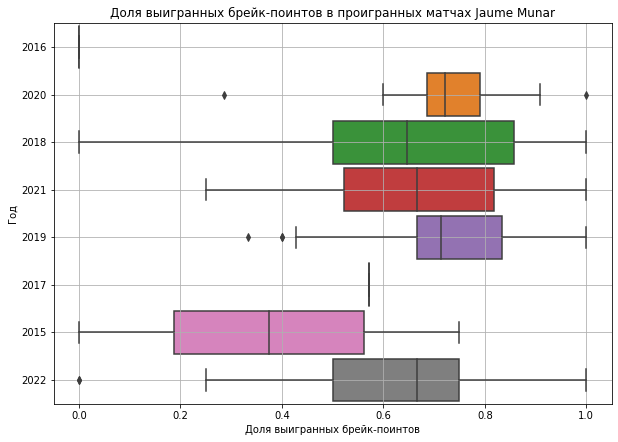

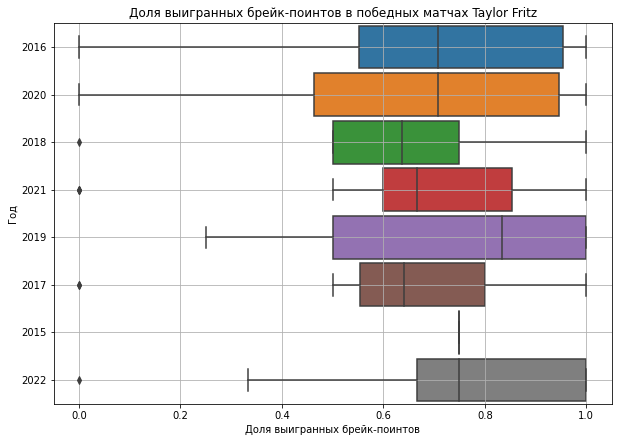

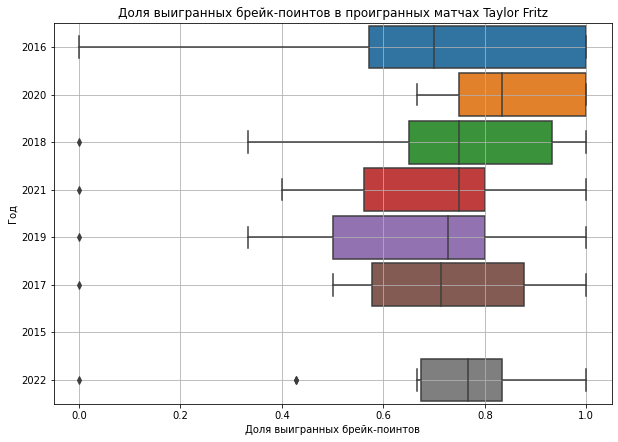

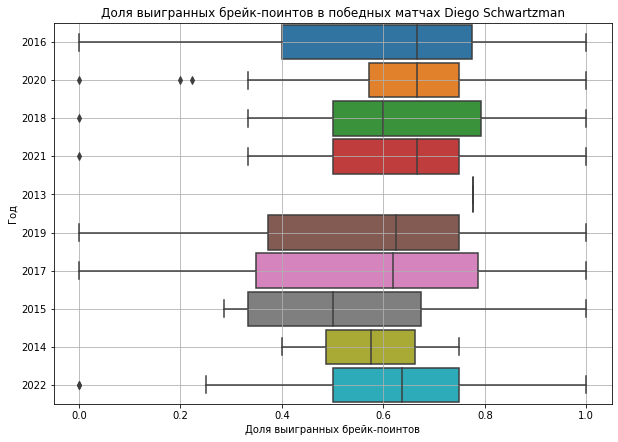

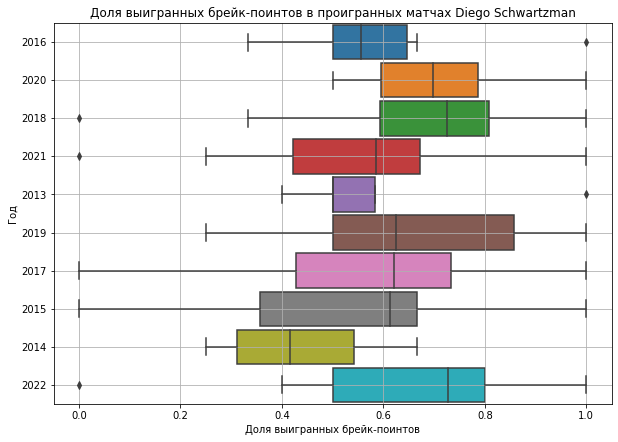

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

!git clone https://github.com/JeffSackmann/tennis_atp
glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')
matches_1968_2022 = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')], axis=0)

munar_full = matches_1968_2022.loc[
    (matches_1968_2022['winner_name'] == 'Jaume Munar') | (matches_1968_2022['loser_name'] == 'Jaume Munar')].copy()
munar = munar_full.loc[:, ['tourney_date', 'winner_name', 'w_bpFaced', 'l_bpFaced', 'w_bpSaved', 'l_bpSaved']]
munar.tourney_date.apply(lambda x: '%.0f' % round(x, 0))
munar.loc[:, 'tourney_date'] = pd.to_datetime(munar['tourney_date'], format='%Y%m%d')
munar['tourney_year'] = munar['tourney_date'].astype(str).str[:4]
munar_clean = munar.dropna(how='any', axis=0)
munar_clean['breakpoints_won_perc'] = munar_clean['w_bpSaved'] / munar_clean['w_bpFaced'].where(
    munar_clean['winner_name'] == 'Jaume Munar')
munar_clean['breakpoints_los_perc'] = munar_clean['w_bpSaved'] / munar_clean['w_bpFaced'].where(
    munar_clean['winner_name'] != 'Jaume Munar')
display(munar_clean)

fig1 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=munar_clean,
    y='tourney_year',
    x='breakpoints_won_perc',
    orient='h',
    width=0.9
)
boxplot.set_title('Доля выигранных брейк-поинтов в победных матчах Jaume Munar')
boxplot.set_xlabel('Доля выигранных брейк-поинтов')
boxplot.set_ylabel('Год')
boxplot.grid()

fig2 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=munar_clean,
    y='tourney_year',
    x='breakpoints_los_perc',
    orient='h',
    width=0.9
)
boxplot.set_title('Доля выигранных брейк-поинтов в проигранных матчах Jaume Munar')
boxplot.set_xlabel('Доля выигранных брейк-поинтов')
boxplot.set_ylabel('Год')
boxplot.grid()

fritz_full = matches_1968_2022.loc[
    (matches_1968_2022['winner_name'] == 'Taylor Fritz') | (matches_1968_2022['loser_name'] == 'Taylor Fritz')].copy()
fritz = fritz_full.loc[:, ['tourney_date', 'winner_name', 'w_bpFaced', 'l_bpFaced', 'w_bpSaved', 'l_bpSaved']]
fritz.tourney_date.apply(lambda x: '%.0f' % round(x, 0))
fritz.loc[:, 'tourney_date'] = pd.to_datetime(fritz['tourney_date'], format='%Y%m%d')
fritz['breakpoints_won_perc'] = fritz['w_bpSaved'] / fritz['w_bpFaced']
fritz['breakpoints_los_perc'] = fritz['l_bpSaved'] / fritz['l_bpFaced']
fritz['tourney_year'] = fritz['tourney_date'].astype(str).str[:4]
fritz_clean = fritz.dropna(how='any', axis=0)
fritz_clean['breakpoints_won_perc'] = fritz_clean['w_bpSaved'] / fritz_clean['w_bpFaced'].where(
    fritz_clean['winner_name'] == 'Taylor Fritz')
fritz_clean['breakpoints_los_perc'] = fritz_clean['w_bpSaved'] / fritz_clean['w_bpFaced'].where(
    fritz_clean['winner_name'] != 'Taylor Fritz')
display(fritz_clean)

fig3 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=fritz_clean,
    y='tourney_year',
    x='breakpoints_won_perc',
    orient='h',
    width=0.9
)
boxplot.set_title('Доля выигранных брейк-поинтов в победных матчах Taylor Fritz')
boxplot.set_xlabel('Доля выигранных брейк-поинтов')
boxplot.set_ylabel('Год')
boxplot.grid()

fig4 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=fritz_clean,
    y='tourney_year',
    x='breakpoints_los_perc',
    orient='h',
    width=0.9
)
boxplot.set_title('Доля выигранных брейк-поинтов в проигранных матчах Taylor Fritz')
boxplot.set_xlabel('Доля выигранных брейк-поинтов')
boxplot.set_ylabel('Год')
boxplot.grid()

schwartzman_full = matches_1968_2022.loc[(matches_1968_2022['winner_name'] == 'Diego Schwartzman') | (
        matches_1968_2022['loser_name'] == 'Diego Schwartzman')].copy()
schwartzman = schwartzman_full.loc[:, ['tourney_date', 'winner_name', 'w_bpFaced', 'l_bpFaced', 'w_bpSaved',
                                       'l_bpSaved']]
schwartzman.tourney_date.apply(lambda x: '%.0f' % round(x, 0))
schwartzman.loc[:, 'tourney_date'] = pd.to_datetime(schwartzman['tourney_date'], format='%Y%m%d')
schwartzman['breakpoints_won_perc'] = schwartzman['w_bpSaved'] / schwartzman['w_bpFaced']
schwartzman['breakpoints_los_perc'] = schwartzman['l_bpSaved'] / schwartzman['l_bpFaced']
schwartzman['tourney_year'] = schwartzman['tourney_date'].astype(str).str[:4]
schwartzman_clean = schwartzman.dropna(how='any', axis=0)
schwartzman_clean['breakpoints_won_perc'] = schwartzman_clean['w_bpSaved'] / schwartzman_clean['w_bpFaced'].where(
    schwartzman_clean['winner_name'] == 'Diego Schwartzman')
schwartzman_clean['breakpoints_los_perc'] = schwartzman_clean['w_bpSaved'] / schwartzman_clean['w_bpFaced'].where(
    schwartzman_clean['winner_name'] != 'Diego Schwartzman')
display(schwartzman_clean)

fig5 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=schwartzman_clean,
    y='tourney_year',
    x='breakpoints_won_perc',
    orient='h',
    width=0.9
)
boxplot.set_title('Доля выигранных брейк-поинтов в победных матчах Diego Schwartzman')
boxplot.set_xlabel('Доля выигранных брейк-поинтов')
boxplot.set_ylabel('Год')
boxplot.grid()

fig6 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=schwartzman_clean,
    y='tourney_year',
    x='breakpoints_los_perc',
    orient='h',
    width=0.9
)
boxplot.set_title('Доля выигранных брейк-поинтов в проигранных матчах Diego Schwartzman')
boxplot.set_xlabel('Доля выигранных брейк-поинтов')
boxplot.set_ylabel('Год')
boxplot.grid()


Распределения по годам (по победным и по проигранным матчам) являются независимыми для каждого из игроков.

Выясним, будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками, с помощью м**ногофакторного дисперсионного анализа MANOVA**.

In [ ]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('breakpoints_won_perc, breakpoints_los_perc', data = munar_clean.merge(schwartzman_clean.all(), fritz_clean.all()))
print(fit.mv_test())

ValueError: ignored

# Задача 5
У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

<ipython-input-61-86e1a8e0eb0e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  munar_clean['breakpoints_won_perc'] = munar_clean['w_bpSaved']\
<ipython-input-61-86e1a8e0eb0e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  munar_clean['breakpoints_los_perc'] = munar_clean['w_bpSaved']\
<ipython-input-61-86e1a8e0eb0e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,tourney_date,winner_name,w_bpFaced,l_bpFaced,w_bpSaved,l_bpSaved,tourney_year,breakpoints_won_perc,breakpoints_los_perc,win/lose
1038,2016-04-18,Albert Ramos,1.0,7.0,0.0,3.0,2016,NaN,0.000000,0.000000
120,2020-01-13,Albert Ramos,11.0,9.0,8.0,5.0,2020,NaN,0.727273,0.727273
185,2020-01-20,Jaume Munar,17.0,28.0,12.0,19.0,2020,0.705882,NaN,NaN
240,2020-01-20,Alexei Popyrin,4.0,9.0,4.0,5.0,2020,NaN,1.000000,1.000000
301,2020-02-03,Diego Schwartzman,7.0,8.0,5.0,3.0,2020,NaN,0.714286,0.714286
...,...,...,...,...,...,...,...,...,...,...
2403,2022-10-03,Pedro Martinez,8.0,17.0,4.0,10.0,2022,NaN,0.500000,0.500000
2411,2022-10-03,Jaume Munar,5.0,8.0,4.0,4.0,2022,0.800000,NaN,NaN
2476,2022-10-10,Sebastian Korda,0.0,9.0,0.0,5.0,2022,NaN,NaN,NaN
2544,2022-10-17,Yoshihito Nishioka,1.0,7.0,0.0,3.0,2022,NaN,0.000000,0.000000


ValueError: ignored

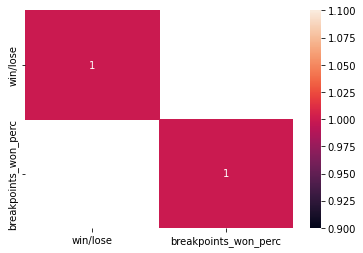

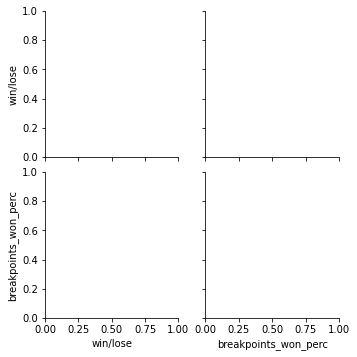

In [ ]:
import pandas as pd
import glob
import scipy.stats as stats
import seaborn as sns

glob.glob('tennis_atp/atp_matches_[12][019][01298]*')
matches_1968_2022 = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][09][0126789]*')], axis=0)
munar_full = matches_1968_2022.loc[(matches_1968_2022['winner_name'] == 'Jaume Munar')
                                   | (matches_1968_2022['loser_name'] == 'Jaume Munar')].copy()
munar = munar_full.loc[:, ['tourney_date', 'winner_name', 'w_bpFaced', 'l_bpFaced', 'w_bpSaved', 'l_bpSaved']]

munar.tourney_date.apply(lambda x: '%.0f' % round(x, 0))
munar.loc[:, 'tourney_date'] = pd.to_datetime(munar['tourney_date'], format='%Y%m%d')
munar['tourney_year'] = munar['tourney_date'].astype(str).str[:4]
munar_clean = munar.dropna(how='any', axis=0)
munar_clean['breakpoints_won_perc'] = munar_clean['w_bpSaved']\
                                      / munar_clean['w_bpFaced'].where(munar_clean['winner_name'] == 'Jaume Munar')
munar_clean['breakpoints_los_perc'] = munar_clean['w_bpSaved']\
                                      / munar_clean['w_bpFaced'].where(munar_clean['winner_name'] != 'Jaume Munar')
munar_clean['win/lose'] = munar_clean['winner_name'].where(munar_clean['winner_name'] == 'Jaume Munar')
munar_clean['win/lose'] = munar_clean['breakpoints_los_perc'].where(munar_clean['winner_name'] != 'Jaume Munar')
display(munar_clean)

# выполним статистический тест - Хи-квадрат-тест https://www.askpython.com/python/examples/chi-square-test
stats.ks_2samp(munar_clean['breakpoints_won_perc'], munar_clean['win/lose'])


H0(нулевая гипртеза): количество выигранных брейкпоинтов не зависит от результата матча

H1(альтернативная гипртеза): количество выигранных брейкпоинтов зависит от результата матча

Поскольку значение P (0,005) меньше уровня значимости (0,05), **отклоняем нулевую гипотезу** и принимаем альтернативную.
P на порядок меньше уровня значимости, из чего следует, что связь неслабая.